In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
def lrs(x,y):
    x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy Score: "+ str(accuracy_score(y_pred,y_test)))
    print(confusion_matrix(y_true=y_test,y_pred=y_pred))
    print("Precision score:" , precision_score(y_pred, y_test))
    print('Recall score:' ,recall_score(y_pred, y_test))
    print('G-mean score:',geometric_mean_score(y_pred, y_test))
    print('Fl score:', f1_score(y_pred, y_test))
    logit_roc_auc=roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds =roc_curve(y_test, model.predict_proba(x_test)[ :,1])
    plt.figure()
    plt.plot(fpr, tpr, label="AUC= %0.2f" % auc(fpr, tpr))
    plt.plot ([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.show()

In [3]:
train = pd.read_csv("train.csv")
train = train.dropna(axis=0)
x = train.drop(['target'], axis =1).select_dtypes(exclude = ['object'])
y = train.target

Without Sampling

Accuracy Score: 0.9630272619340965
[[171962      0]
 [  6602      0]]
Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fl score: 0.0


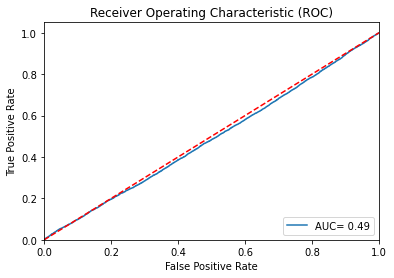

In [4]:
lrs(x,y)

Random Under Sampling

In [5]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler()
x_resampled_rus, y_resampled_rus = rus.fit_resample(x,y)
print(sorted(Counter(y_resampled_rus).items()))

[(0, 21694), (1, 21694)]


Accuracy Score: 0.5054928170853499
[[2284 4259]
 [2178 4296]]
Precision score: 0.6635773864689527
Recall score: 0.5021624780829924
G-mean score: 0.5069970078032611
Fl score: 0.5716947235345


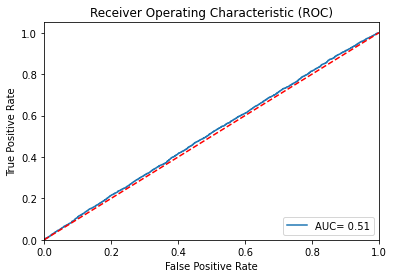

In [6]:
lrs(x_resampled_rus,y_resampled_rus)

Tomek Link

In [7]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks()
x_resampled_tl, y_resampled_tl = tl.fit_resample(x, y)
print(sorted(Counter(y_resampled_tl).items()))

[(0, 561433), (1, 21694)]


Accuracy Score: 0.9624669170396538
[[168373      0]
 [  6566      0]]
Precision score: 0.0


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score: 0.0
G-mean score: 0.0
Fl score: 0.0


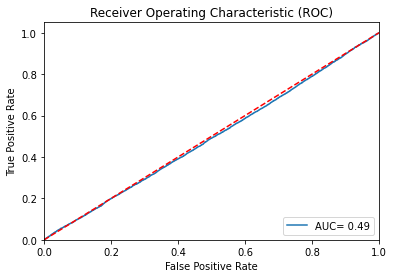

In [8]:
lrs(x_resampled_tl,y_resampled_tl)

Edited Nearest Neighbors (ENN)

In [9]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
x_resampled_enn, y_resampled_enn = enn.fit_resample(x, y)
print(sorted(Counter(y_resampled_enn).items()))

[(0, 514202), (1, 21694)]


Accuracy Score: 0.9593764967126747
[[154238      0]
 [  6531      0]]
Precision score: 0.0
Recall score: 0.0
G-mean score: 0.0
Fl score: 0.0


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


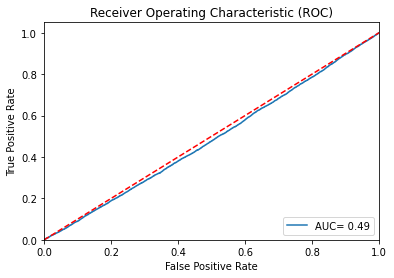

In [10]:
lrs(x_resampled_enn,y_resampled_enn)

Random Oversampling

In [11]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_resampled_ros, y_resampled_ros = ros.fit_resample(x,y)
print(sorted(Counter(y_resampled_ros).items()))

[(0, 573518), (1, 573518)]


Accuracy Score: 0.49839731946958976
[[     0 172607]
 [     0 171504]]
Precision score: 1.0
Recall score: 0.49839731946958976
G-mean score: 0.0
Fl score: 0.6652405379983127


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


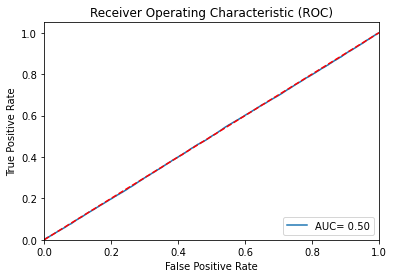

In [12]:
lrs(x_resampled_ros,y_resampled_ros)

Synthetic Minority Oversampling Technique (SMOTE)

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_resampled_sm, y_resampled_sm = sm.fit_resample(x,y)
print(sorted(Counter(y_resampled_sm).items()))

[(0, 573518), (1, 573518)]


Accuracy Score: 0.5286375617170042
[[ 74852  97728]
 [ 64473 107058]]
Precision score: 0.6241320810815538
Recall score: 0.5227798775306906
G-mean score: 0.5299642935805386
Fl score: 0.568977750141503


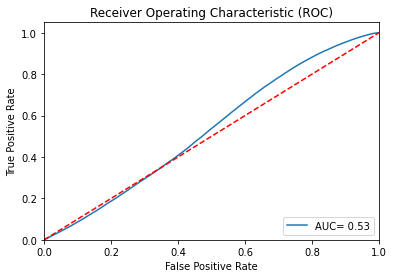

In [14]:
lrs(x_resampled_sm,y_resampled_sm)

Adaptive Synthetic Sampling (ADASYN)

In [15]:
from imblearn.over_sampling import ADASYN
ad = ADASYN()
x_resampled_ad, y_resampled_ad = ad.fit_resample(x,y)
print(sorted(Counter(y_resampled_ad).items()))

[(0, 573518), (1, 566223)]


Accuracy Score: 0.5026014629024663
[[171851      0]
 [170072      0]]
Precision score: 0.0


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score: 0.0
G-mean score: 0.0
Fl score: 0.0


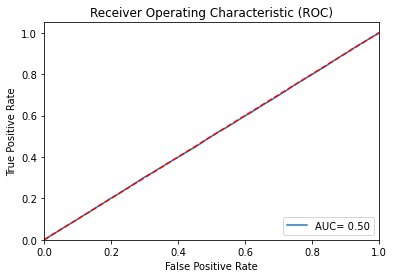

In [16]:
lrs(x_resampled_ad,y_resampled_ad)

Hybrid 1

In [17]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
x_resampled_smen, y_resampled_smen = smote_enn.fit_resample(x, y)
print(sorted(Counter(y_resampled_smen).items()))

[(0, 288427), (1, 469953)]


Accuracy Score: 0.6190080610423974
[[     0  86681]
 [     0 140833]]
Precision score: 1.0
Recall score: 0.6190080610423974


C:\Users\Kunal Mittal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


G-mean score: 0.0
Fl score: 0.764675699815663


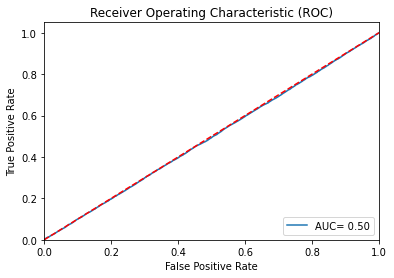

In [18]:
lrs(x_resampled_smen, y_resampled_smen)

Hybrid 2

In [19]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek()
x_resampled_smtm, y_resampled_smtm = smote_tomek.fit_resample(x, y)
print(sorted(Counter(y_resampled_smtm).items()))

[(0, 555439), (1, 555439)]


Accuracy Score: 0.5305823611311152
[[ 75366  91568]
 [ 64872 101458]]
Precision score: 0.6099801599230446
Recall score: 0.5256183104866702
G-mean score: 0.5314839098712397
Fl score: 0.5646656797159364


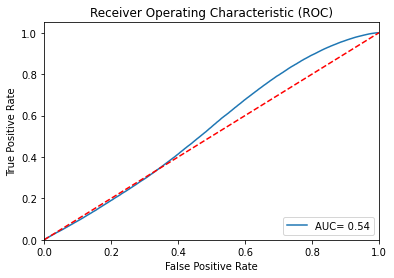

In [20]:
lrs(x_resampled_smtm, y_resampled_smtm)